In [1]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PSF, DCD
from MDAnalysis.analysis import pca, align


topology_file = "/home/uni/necessary-things-for-recreating-bioemu-project-from-scratch/PDBs/topology-1200-odd-atoms.pdb"
trajectory_file = "/home/uni/necessary-things-for-recreating-bioemu-project-from-scratch/PDBs/visualization-1200-odd-atoms/combined-samples-trajectory.pdb"
u = mda.Universe(topology_file, trajectory_file)
n_pc = None # number of principal components to compute; None means all components

# Align the trajectory to the first frame using the backbone atoms
# This is necessary for PCA to ensure that the analysis is not affected by translational and rotational motion
# and to focus on the conformational changes of the protein.
aligner = align.AlignTraj(u, u, select='backbone', in_memory=True).run()

pca_analysis = pca.PCA(u, select='backbone', align=True, mean=None, n_components=n_pc).run()

backbone = u.select_atoms('backbone')
bb_count = len(backbone)
print(f"Number of backbone atoms: {bb_count}")
print(pca_analysis.p_components.shape)

# variance of each component
for i, variance in enumerate(pca_analysis.variance):
    print(f"Variance {i+1}: {variance}")

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='MDAnalysis') # looks like biopython, a dependency has some sort of deprecation; uncomment this line to find out 

/home/uni/miniconda3/lib/python3.13/site-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(
/home/uni/miniconda3/lib/python3.13/site-packages/MDAnalysis/core/universe.py:743: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,


Number of backbone atoms: 304
(912, 912)
Variance 1: 214.65296659596473
Variance 2: 202.4364130634726
Variance 3: 87.45838684525197
Variance 4: 36.68733564788387
Variance 5: 21.59001391510036
Variance 6: 13.519342214077424
Variance 7: 11.542732349899493
Variance 8: 9.131482720518491
Variance 9: 8.559629815915214
Variance 10: 7.7648756215173105
Variance 11: 6.258530534001775
Variance 12: 5.6773904849711565
Variance 13: 4.960197695935209
Variance 14: 4.636761129575411
Variance 15: 4.287851250603124
Variance 16: 3.988551016203273
Variance 17: 3.582606626396963
Variance 18: 3.2547555268219632
Variance 19: 3.133518085644717
Variance 20: 2.987875675623034
Variance 21: 2.8986334532736775
Variance 22: 2.7382785166520667
Variance 23: 2.448228060647673
Variance 24: 2.3771025956581426
Variance 25: 2.186364740980222
Variance 26: 2.0103684179617156
Variance 27: 1.948545218459949
Variance 28: 1.8460092969305733
Variance 29: 1.7483730575902101
Variance 30: 1.6668919401551299
Variance 31: 1.6082909791

/home/uni/miniconda3/lib/python3.13/site-packages/MDAnalysis/analysis/pca.py:350: DeprecationWarning: The `p_components` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.p_components` instead.
  warnings.warn(wmsg, DeprecationWarning)
/home/uni/miniconda3/lib/python3.13/site-packages/MDAnalysis/analysis/pca.py:360: DeprecationWarning: The `variance` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.variance` instead.
  warnings.warn(wmsg, DeprecationWarning)


/home/uni/miniconda3/lib/python3.13/site-packages/MDAnalysis/analysis/pca.py:370: DeprecationWarning: The `cumulated_variance` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.cumulated_variance` instead.
  warnings.warn(wmsg, DeprecationWarning)


Text(0, 0.5, 'Cumulative variance')

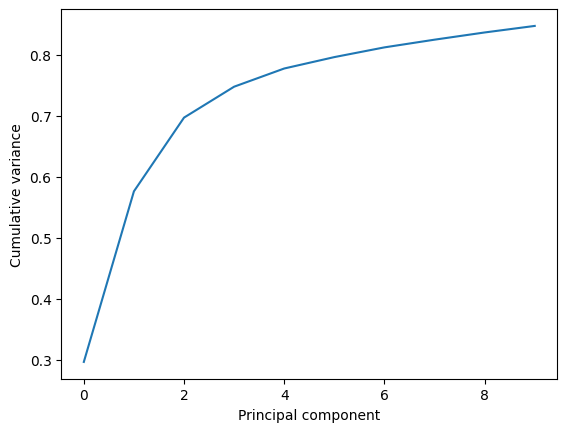

In [2]:
import matplotlib.pyplot as mplt
mplt.plot(pca_analysis.cumulated_variance[:10])
mplt.xlabel('Principal component')
mplt.ylabel('Cumulative variance')
# mplt.show()  # uncomment to show the plot in a non interactive environment

Reduced-dimension visualization

In [3]:
weights = pca_analysis.transform(backbone,n_components=n_pc)
weights.shape # (n_frames, n_components)

# For easy handling, we can convert the weights to a pandas DataFrame
import pandas as pd
weights_df = pd.DataFrame(weights, columns=[f'PC{i+1}' for i in range(weights.shape[1])])
weights_df['time (ps)'] = weights_df.index * u.trajectory.dt
weights_df.head()
# Save the weights to a CSV file for further analysis
weights_df.to_csv('pca_weights.csv', index=False)


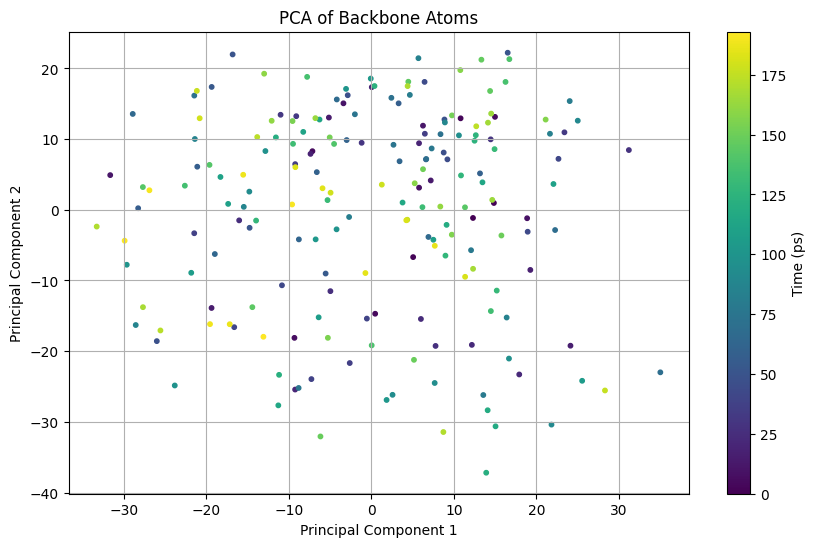

In [4]:
# Plot the first two principal components
mplt.figure(figsize=(10, 6))
mplt.scatter(weights_df['PC1'], weights_df['PC2'], c=weights_df['time (ps)'], cmap='viridis', s=10)
mplt.colorbar(label='Time (ps)')
mplt.xlabel('Principal Component 1')
mplt.ylabel('Principal Component 2')
mplt.title('PCA of Backbone Atoms')
mplt.grid()
# mplt.show()  # uncomment to show the plot in a non interactive environment

In [ ]:
"""
import seaborn as sbn

pg = sbn.PairGrid(weights_df, hue='time (ps)', palette=sbn.color_palette("viridis", n_colors=len(weights_df)))
pg.map(mplt.scatter, marker='o',)
#mplt.show()  # uncomment to show the plot in a non interactive environment
# Save the pair grid plot
pg.savefig('pair_grid_plot.png')
"""

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7feeaef5be00>>
Traceback (most recent call last):
  File "/home/uni/miniconda3/lib/python3.13/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [ ]:
pc1 = pca_analysis.p_components[:, 0]
weights1 = weights[:, 0]

import numpy
projected = numpy.outer(weights1, pc1) + pca_analysis.mean.flatten()
coordinates = projected.reshape(len(weights1), -1, 3)

In [ ]:
proj_pc1 = mda.Merge(backbone)
proj_pc1.load_new(coordinates, order='fac')

import nglview as ngl

view = ngl.show_mdanalysis(proj_pc1.atoms)
view
